<a href="https://colab.research.google.com/github/su01man/Water-Quality-Prediction/blob/main/Project_Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project : **Water Quality Prediction**

## Objective :
The goal of this project is to predict water quality based on certain water
parameters such as 'pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity' .

---



Here are the objectives of the **Water Quality Prediction** :

1. **Collect and Analyze** water quality data, including parameters like pH, turbidity, and dissolved oxygen.
2. **Preprocess the data** by handling missing values, scaling features, and encoding categorical variables.
3. Perform **Exploratory Data Analysis (EDA)** to identify patterns, correlations, and trends in the dataset.
4. **Develop machine learning models** for predicting water quality (e.g. Logistic Regression, K-Nearest Neighbors (KNN):, Support Vector Machine (SVM) ).
5. **Evaluate model performance** using accuracy, precision, recall.
6. **Optimize models** through hyperparameter tuning and feature selection to improve accuracy.
7. Analyze **feature importance** to determine which factors most influence water quality predictions.
8. **Monitor and update** the model regularly to maintain its accuracy over time.
9. **Document and present** the results, providing insights for water quality monitoring and public health.

## Data Source
Kaggle: There are datasets on water quality, such as the Water Potability Dataset, which focuses on the classification of water as potable (safe) or non-potable (unsafe).

## Import Library

In [150]:
import numpy as np # to work with arrays
import matplotlib.pyplot as plt # to plot the data in graphs, to visaulize the data
import pandas as pd # to work with data
import seaborn as sns

## Import Data

In [151]:
ds = pd.read_csv('/content/sample_data/water_potability.csv') # reading the csv File and saving it to a dataset variable

## Describe Data

In [152]:
ds.head()  # it shows the first 5 rows of Dataset, to verify the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [153]:
ds.shape  # it shows the number of rows and  columns

(3276, 10)

In [154]:
ds.columns  # it shows the name of columns heading

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [155]:
ds.describe()  # basics ideas of Statistics for columns

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [156]:
ds.info()  # it shows the information of DataTypes present in Dataset and shows the missing or null values in Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Preprocessing

In [157]:
ds.isnull().sum()  # it shows the missing or null values present in Dataset

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [158]:
# Handling missing values
# to fill the null or missing value by using mean
ds.fillna(ds.mean(), inplace=True)
ds.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [159]:
ds.info()  # it shows the information of DataTypes present in Dataset after handling missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [160]:
ds.describe()  # basics ideas of Statistics for columns after handling missing value

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Data Visualization

In [161]:
# Potability
# Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
# (0) Water is not safe to drink and (1) Water is safe to drink

ds.Potability.value_counts()  # count the values , present in Potability column

,count
Potability,
0,1998
1,1278


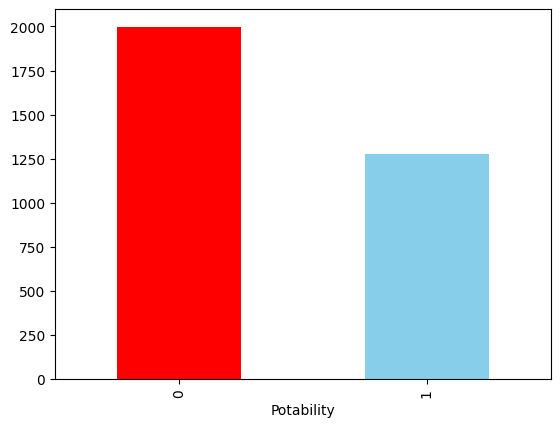

In [162]:
# Histogram chart for Potability
ds.Potability.value_counts().plot(kind="bar", color=["Red", "skyblue"])
plt.show()

<ipython-input-163-17801b6ed91c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['ph'])


<Axes: xlabel='ph', ylabel='Density'>

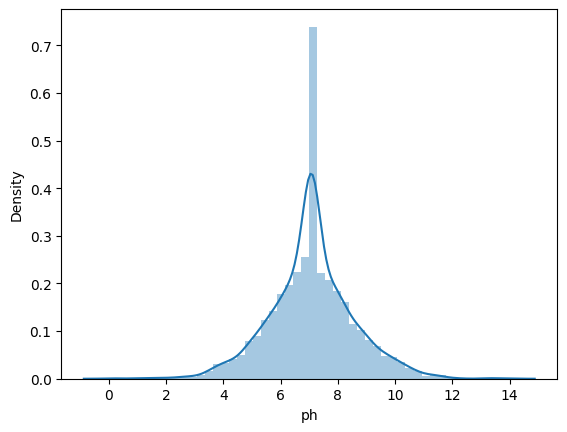

In [163]:
sns.distplot(ds['ph'])

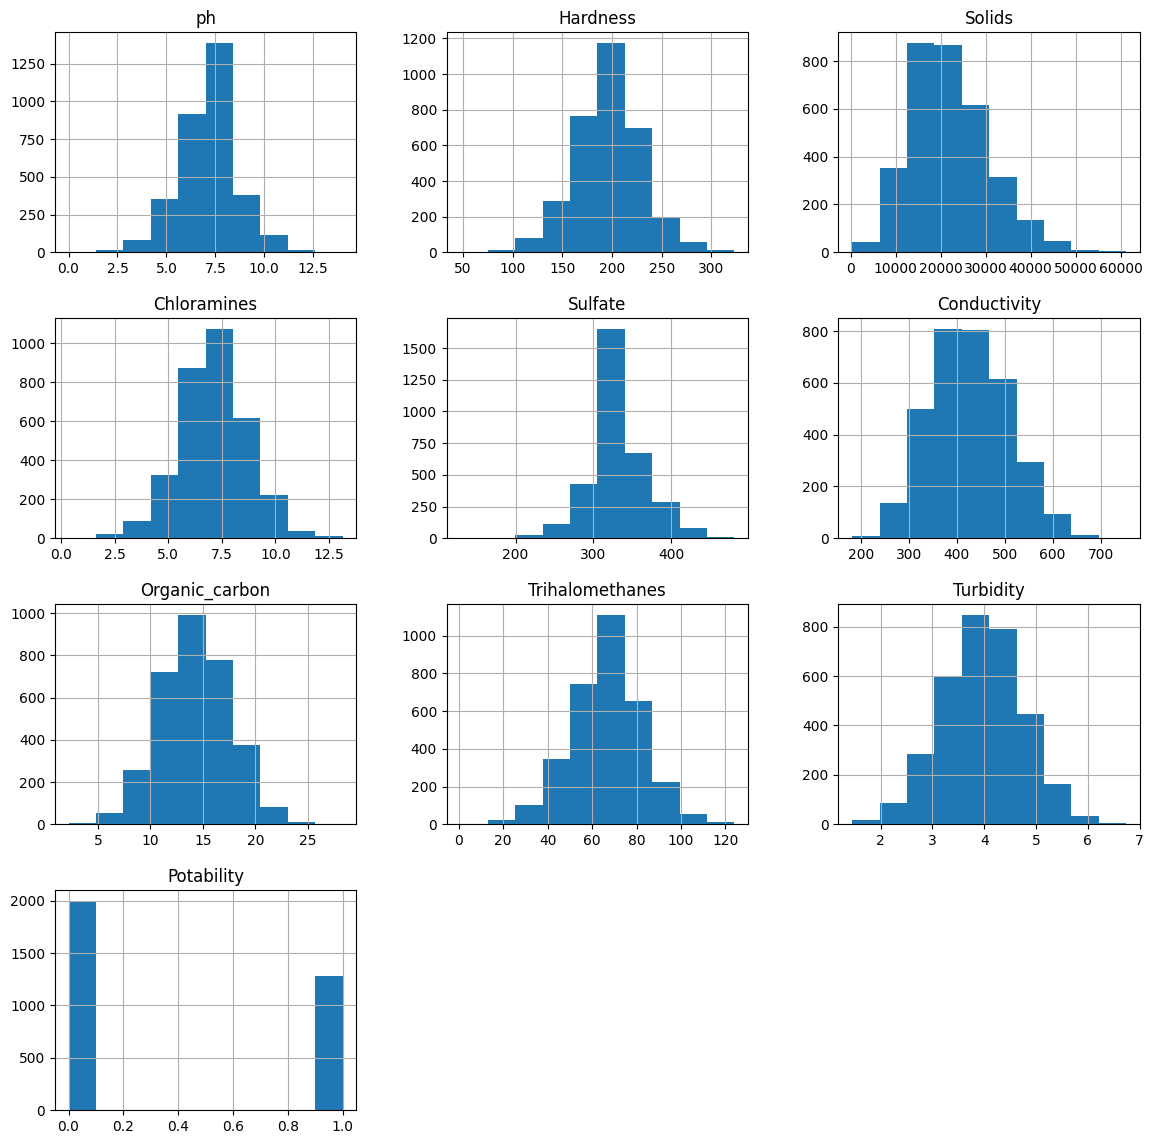

In [164]:
# Histogram chart for each and every columns

ds.hist(figsize=(14,14))
plt.show()

<Axes: >

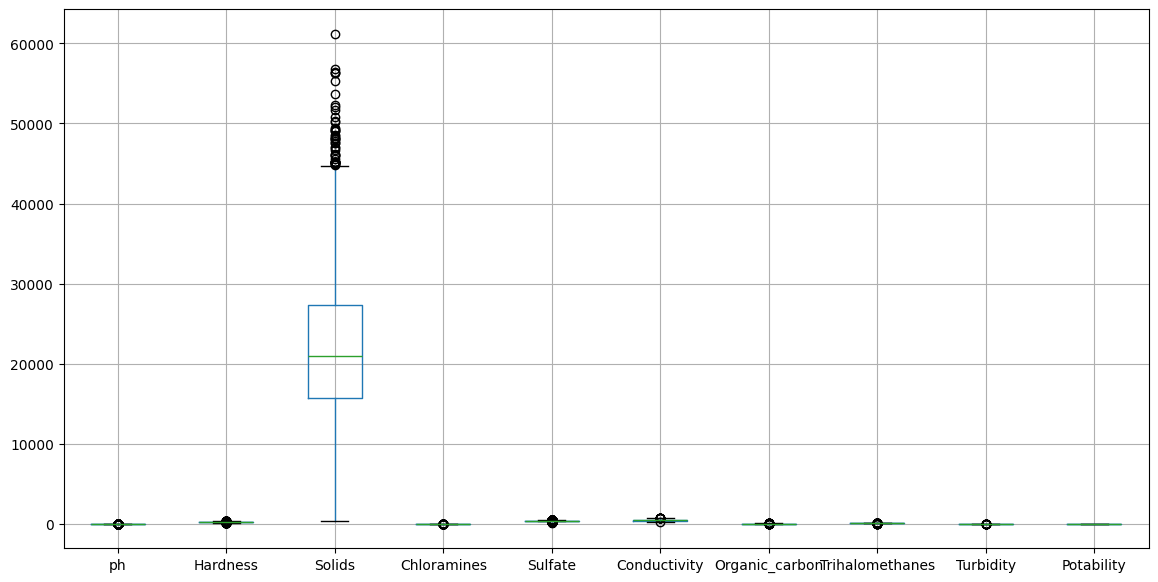

In [165]:
ds.boxplot(figsize=(14,7))  # to create a boxplot for all numerical columns in the dataset, using a specified figure size.

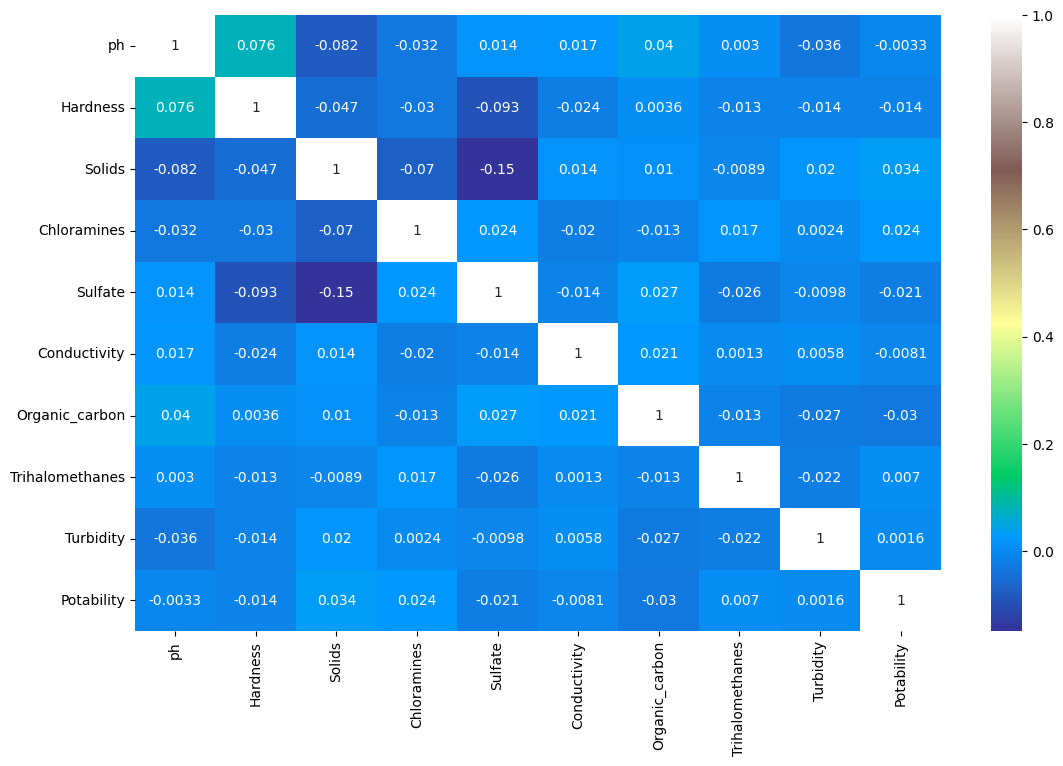

In [166]:
# create a correlation heatmap
plt.figure(figsize=(13,8))
sns.heatmap(ds.corr(),annot=True,cmap='terrain')
plt.show()

## Define Target Variable (y) and Feature Variables (x)


In [167]:
x = ds[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = ds['Potability']

In [168]:
x.shape, y.shape

((3276, 9), (3276,))

In [169]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [170]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


## Train Test Split

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 2529)

In [172]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

In [173]:
print(x_test)

             ph    Hardness        Solids  Chloramines     Sulfate  \
153    4.801154  180.772871  13556.734397     8.977286  322.062447   
1242   8.555283  216.655356  18337.460916     8.290688  311.325845   
1911   6.851443  197.339559  15349.142585     7.446412  333.775777   
1842   9.264391  160.428694  19607.754919     3.988749  416.698385   
2819   7.356057  234.782302  31409.063979     7.395530  283.509583   
...         ...         ...           ...          ...         ...   
2944   6.798097  198.116381  35883.780110     7.051814  333.775777   
2908   7.080795  239.757929  12318.403886     6.407733  259.122131   
208   10.026159  224.266358  14962.177833     7.428313  336.972950   
1052   9.045721  222.184169  22829.110842     7.609833  293.062459   
3129   6.397905  249.969243  22057.051786     4.892717  375.494474   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
153     587.395012       12.401368        62.028187   4.418638  
1242    390.943089       17.1

## Modeling

### I am using Different types of models methods in this project with Prediction and Accuracy:
### 1.   Logistic Regression
### 2.   KNeighbors Classifier
### 3.   SVM (Support Vector Machine)
### 4.   Random Forest Classifier

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## 1. Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 3800)  # create object of LogisticRegression

lr.fit(x_train, y_train)  # training  model

LogisticRegression(max_iter=3800)

In [176]:
# making Prediction

prediction_lr = lr.predict(x_test)

In [177]:
print(prediction_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [178]:
# Accuracy Score
accuracy_lr = accuracy_score(y_test, prediction_lr)*100
print(accuracy_lr,'%')

61.12804878048781 %


In [179]:
cm_lr = confusion_matrix(y_test, prediction_lr)
print(cm_lr)

[[401   0]
 [255   0]]


## 2. KNeighbors Classifier

In [180]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # create object of KNeighbors Classifier

In [181]:
# finding best accuracy score by iteration in for loop
for i in range(4,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediction_knn = knn.predict(x_test)
  accuracy_knn=accuracy_score(y_test,prediction_knn)
  print(i,accuracy_knn*100,'%')

4 57.62195121951219 %
5 53.963414634146346 %
6 55.79268292682927 %
7 55.1829268292683 %
8 57.012195121951216 %
9 56.09756097560976 %
10 57.62195121951219 %
11 56.40243902439024 %
12 56.55487804878049 %
13 57.46951219512195 %
14 57.46951219512195 %


In [182]:
# find and choose the value of i where the maximum accuracy shown and put this i value in this code on first line (n_neighbors=i)

knn = KNeighborsClassifier(n_neighbors=4)  # create object of LogisticRegression
knn.fit(x_train,y_train)  # training  model
prediction_knn = knn.predict(x_test)  ## making Prediction
accuracy_knn=accuracy_score(y_test,prediction_knn)*100  # Accuracy Score
print(accuracy_knn,'%')

57.62195121951219 %


In [183]:
cm_knn = confusion_matrix(y_test, prediction_knn)
print(cm_knn)

[[341  60]
 [218  37]]


## 3. SVM (Support Vector Machine)

In [184]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")  # create object of SVM (Support Vector Machine)

svm.fit(x_train, y_train)  # training  model

SVC()

In [185]:
prediction_svm = svm.predict(x_test)  # # making Prediction

In [186]:
# Accuracy Score
accuracy_svm = accuracy_score(y_test, prediction_svm)*100
print(accuracy_svm,"%")

61.12804878048781 %


In [187]:
cm_svm = confusion_matrix(y_test, prediction_svm)
print(cm_svm)

[[401   0]
 [255   0]]


## 4. Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # create object of Random Forest Classifier

rfc.fit(x_train, y_train)  # training  model

RandomForestClassifier(random_state=42)

In [189]:
prediction_rfc = rfc.predict(x_test)  # # making Prediction

In [190]:
# Accuracy Score
accuracy_rfc = accuracy_score(y_test, prediction_rfc)*100
print(accuracy_rfc,"%")

65.54878048780488 %


In [191]:
cm_rfc = confusion_matrix(y_test, prediction_rfc)
print(cm_rfc)

[[348  53]
 [173  82]]


## Model Evaluation or Accuracy

In [192]:
# Here are the Accuracy of different types of model
# we find and choose the model that have maximum  Accuracy value for this project

# Bar Chart and Visualization of Accuracy Score of Models

models = pd.DataFrame({
    "Models          ": ["Logistic Regression","KNeighbors Classifier","SVM (Support Vector Machine)","Random Forest Classifier"],
    "      Accuracy Score in %" : [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_rfc]
})

print(models)

               Models                  Accuracy Score in %
0           Logistic Regression                  61.128049
1         KNeighbors Classifier                  57.621951
2  SVM (Support Vector Machine)                  61.128049
3      Random Forest Classifier                  65.548780


## Found best Accuracy Model for this Project is : **Random Forest Classifier** = 65.55 %
---
## Project is done.

## Thank You!